# 1. Problem Description and Objective 
The sinking of the RMS Titanic is one of the most notorious shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This harrowing tragedy shocked the international community and led to better safety regulations for ships.

<img src='./files/titanic.jpg'>

In this problem, we're asked to complete the analysis of what sorts of passengers were likely to survive the tragedy by the given data. So its our job to predict if a passenger survived from the sinking Titanic or not by analyzing the given data. So, it's a <b>Binary Classification Problem</b>.

# 2. Importing Packages and Collecting Data

Ignoring deprecation and future warnings

In [1]:
def suppress_warnings():
    import warnings
    warnings.filterwarnings('ignore', category = DeprecationWarning)
    warnings.filterwarnings('ignore', category = FutureWarning)
    warnings.filterwarnings('ignore', category = RuntimeWarning)

suppress_warnings()

Importing packages

In [2]:
import numpy as np                   # linear algebra
import pandas as pd                  # data manipulation
import matplotlib.pyplot as plt      # 2D visualization
import seaborn as sns                # visualization style
from scipy import stats              # statistics

import plotly.offline as py          # plotly vizz
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True) # notebook plug-in

Custom Style

In [3]:
plt.style.use('bmh')
sns.set_style({'axes.grid':False})

from IPython.display import Markdown # header
def bold(string):
    display(Markdown(string))

Reading the csv files

In [4]:
train = pd.read_csv('./dataset/titanic/train.csv')
bold('**Train data preview:**')
display(train.head(2))
display(train.columns)
display('Train data shape: ' + str(train.shape))

test = pd.read_csv('./dataset/titanic/test.csv')
bold('**Test data preview:**')
display(test.head(2))
display(test.columns)
display('Test data shape: ' + str(test.shape))

**Train data preview:**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

'Train data shape: (891, 12)'

**Test data preview:**

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

'Test data shape: (418, 11)'

<b>Note:</b> Survived attribute is missing in the test dataset. Our task is to predict the survival value (1 for survived, 0 for dead) for each instances learning from the training dataset.

# 3. Variable Description and Identification
<br>
<li>Describing the variables</li>
<li>Target and Predictor variables</li>
<li>Categorical and Numerical variables</li>
<li>Pandas Data Type (i.e., object, float64 or int64) </li>

### Describing the variables

1. **PassengerId:** unique identifying number assigned to each passenger.
2. **Survived:** flag that indicates if a passenger survived or died ( i.e., 0 = No, 1 = Yes).
3. **Pclass:** passenger class (i.e., 1 = 1st class, 2 = 2nd class, 3 = 3rd class).
4. **Name:** name of the passenger with title.
5. **Sex:** gender of the passenger (i.e., male or female).
6. **Age:** age of the passenger.
7. **SibSp:** # of siblings/spouses aboard.
8. **Parch:** # of parents/children aboard.
9. **Ticket:** ticket # issued to the passenger.
10. **Fare:** amount of money spent on their ticket.
11. **Cabin:** cabin category-number occupied by the passenger.
12. **Embarked:** the port where the passenger embarked from (i.e., C = Cherbourg, Q = Queenstown, S = Southampton).

### Response and Predictor variables
1. **Predictor variable:** Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked

2. **Target variable:** Survived

### Categorical and Numerical variables
1. **Categorical Variable:** Survived, Pclass, Name, Sex, SibSp, Parch, Ticket, Cabin, Embarked

2. **Numerical Variable:** PassengerId, Age, Fare

### Pandas Data Type

In [5]:
display(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**int64:** PassengerId, Survived, Pclass, SibSp, Parch<br>
**float64:** Age, Fare<br>
**object:** Name, Sex, Ticket, Cabin, Embarked

# 4. Univariate Analysis
Univariate analysis separately explores the **distribution of each variable** in a data set. It looks at the **range** of values, as well as the **central tendency** of the values.

Univariate data analysis does not look at relationships between various variables (like bivariate and multivariate analysis) rather it summarises each variable on its own. Methods to perform univariate analysis will depend on whether the variable is categorical or numerical.

1. **Categorical Variables:** we would use **bar plots** to visualize the **absolute and proportional frequency distribution**.
2. **Numerical Variables:** we would explore its **shape of distribution** (symmetric or skewed) using **histogram** and **density plots**. 

Knowing the distribution of the feature values becomes important when we use machine learning methods that assume a particular type of it, most often Gaussian in later part.

### 4.1 Categorical Variables
For categorical univariate analysis, we will create **barplot** and data frame of **absolute and relative frequency** for each categorical variable. To analyse categorical variables, we will create three custom functions. The first two functions displays bar labels in absolute and relative scale respectively. And the 3rd one creates a dataframe of absolute and relative frequencies. It also generates abs and relative frequency plot for each variable.

In [6]:
def abs_bar_labels(skewness = 'none'):
    font_size = 15
    plt.ylabel('Absolute Frequency', fontsize = font_size)
    plt.xticks(rotation = 0, fontsize = font_size)
    plt.yticks([])
    
    if(skewness == 'none'):
        for x in ax.patches:
            if (x.get_height() > 70):
                ax.annotate(x.get_height(), (x.get_x() + x.get_width()/2., x.get_height() - 50), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points', fontsize = font_size, color = 'white')
            else:
                ax.annotate(x.get_height(), (x.get_x() + x.get_width()/2., x.get_height() + 20), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points', fontsize = font_size, color = 'black')
    elif(skewness == 'uniform'):
        for x in ax.patches:
            if (x.get_height() > 10):
                ax.annotate(x.get_height(), (x.get_x() + x.get_width()/2., x.get_height() - 10), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points', fontsize = font_size, color = 'white')
            else:
                ax.annotate(x.get_height(), (x.get_x() + x.get_width()/2., x.get_height() + 2.5), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points', fontsize = font_size, color = 'black')

def pct_bar_labels():
    font_size = 15
    plt.ylabel('Relative Frequency (%)', fontsize = font_size)
    plt.xticks(rotation = 0, fontsize = font_size)
    plt.yticks([]) 
    
    for x in ax1.patches:
        if(x.get_height() > 8):
            ax1.annotate(str(x.get_height()) + '%', (x.get_x() + x.get_width()/2., x.get_height() - 5), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points', fontsize = font_size, color = 'white')
        else:
            ax1.annotate(str(x.get_height()) + '%', (x.get_x() + x.get_width()/2., x.get_height() + 2), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points', fontsize = font_size, color = 'black')

def absolute_and_relative_freq(variable):
    global  ax, ax1 
    absolute_frequency = variable.value_counts()
    relative_frequency = round(variable.value_counts(normalize = True)*100, 2)
    df = pd.DataFrame({'Absolute Frequency':absolute_frequency, 'Relative Frequency(%)':relative_frequency})
    print('Univariable Analysis:', variable.name)
    display(df)
    
    fig_size = (18,5)
    font_size = 15
    title_size = 18
    ax =  absolute_frequency.plot.bar(title = 'Absolute Frequency of %s' %variable.name, figsize = fig_size)
    ax.title.set_size(title_size)
    abs_bar_labels()
    plt.show()
    
    ax1 = relative_frequency.plot.bar(title = 'Relative Frequency of %s' %variable.name, figsize = fig_size)
    ax1.title.set_size(title_size)
    pct_bar_labels()
    plt.show()

**4.1.1 Survived**

Univariable Analysis: Survived


,Absolute Frequency,Relative Frequency(%)
0,549,61.62
1,342,38.38


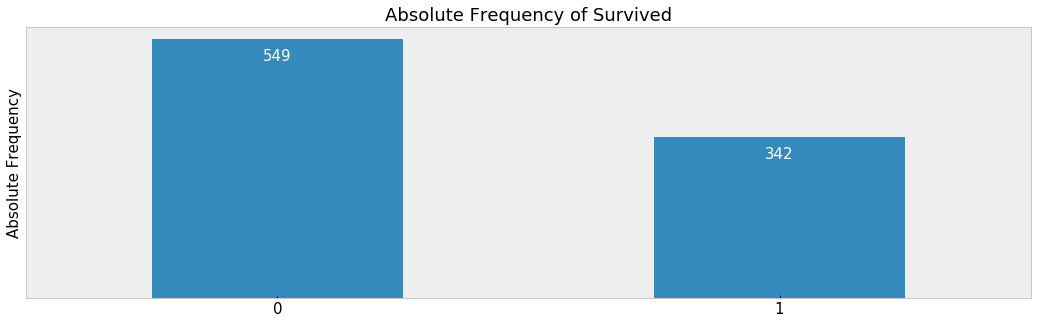

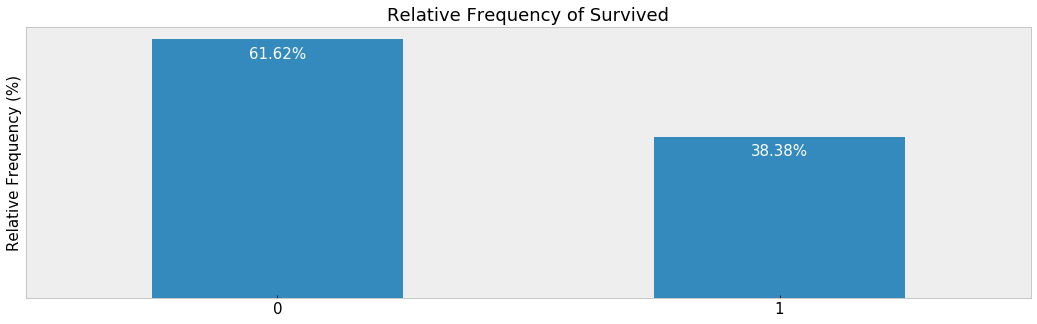

In [7]:
absolute_and_relative_freq(train.Survived)
# _absolute_and_relative_freq(train.Survived, font_size = 15)

**4.1.2 Sex**

Univariable Analysis: Sex


,Absolute Frequency,Relative Frequency(%)
male,577,64.76
female,314,35.24


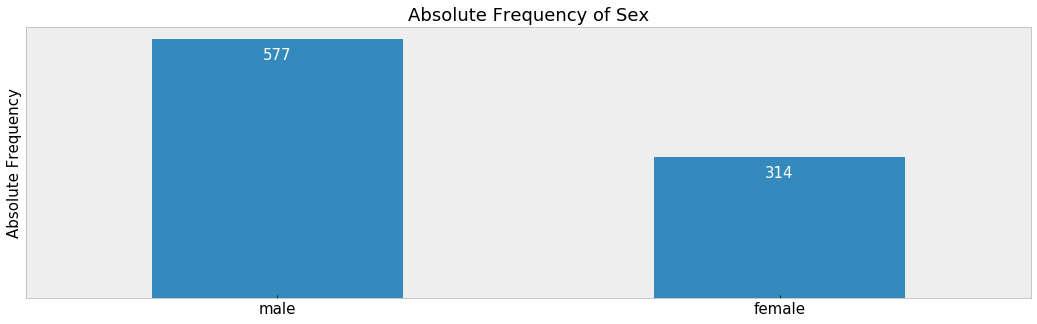

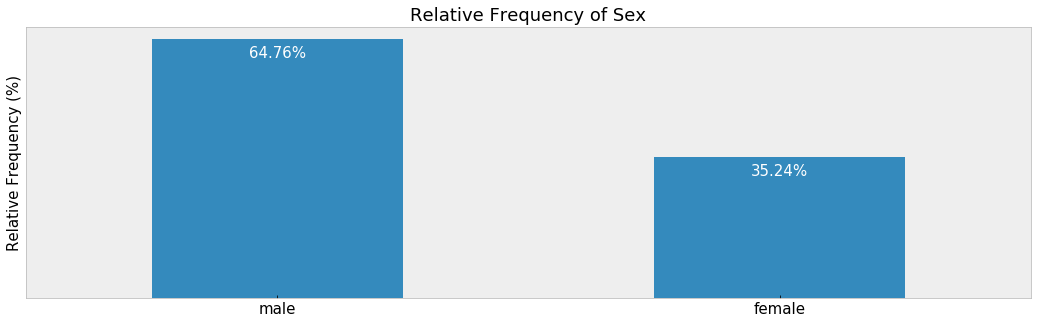

In [8]:
absolute_and_relative_freq(train.Sex)
#_absolute_and_relative_freq(train.Sex, font_size = 15)

**4.1.3 Pclass**

Univariable Analysis: Pclass


,Absolute Frequency,Relative Frequency(%)
3,491,55.11
1,216,24.24
2,184,20.65


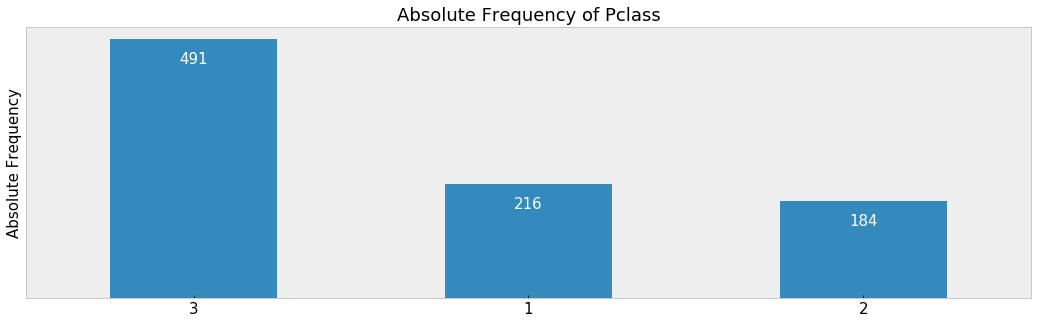

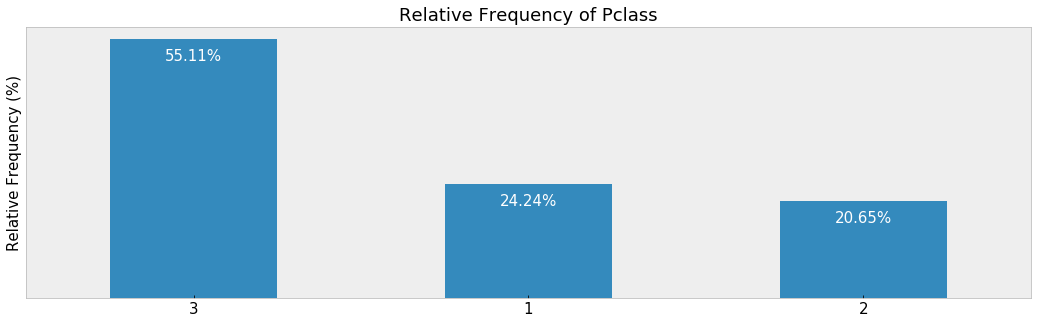

In [9]:
absolute_and_relative_freq(train.Pclass)

#### 4.1.4 Embarked

Univariable Analysis: Embarked


,Absolute Frequency,Relative Frequency(%)
S,644,72.44
C,168,18.90
Q,77,8.66


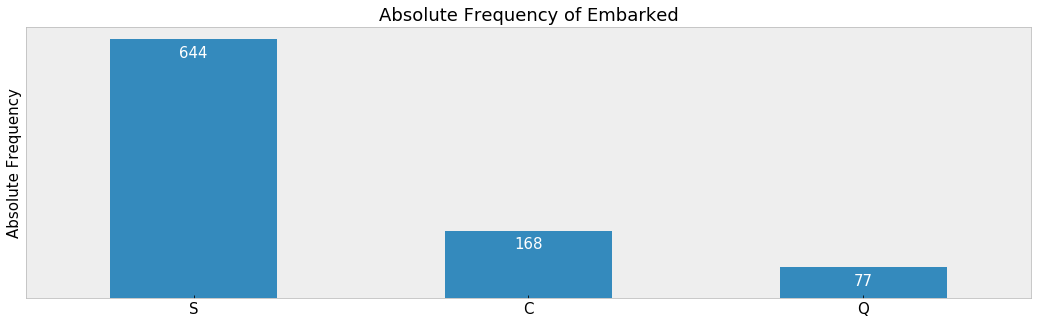

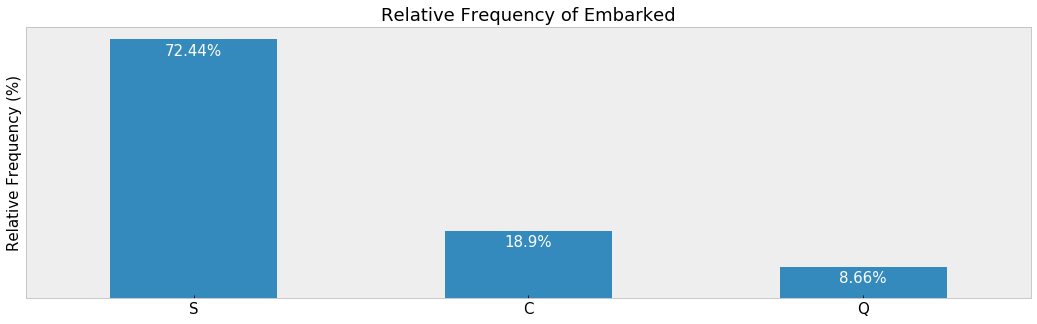

In [10]:
absolute_and_relative_freq(train.Embarked)
#_absolute_and_relative_freq(train.Embarked)

#### 4.1.5 SibSp

Univariable Analysis: SibSp


,Absolute Frequency,Relative Frequency(%)
0,608,68.24
1,209,23.46
2,28,3.14
4,18,2.02
3,16,1.80
8,7,0.79
5,5,0.56


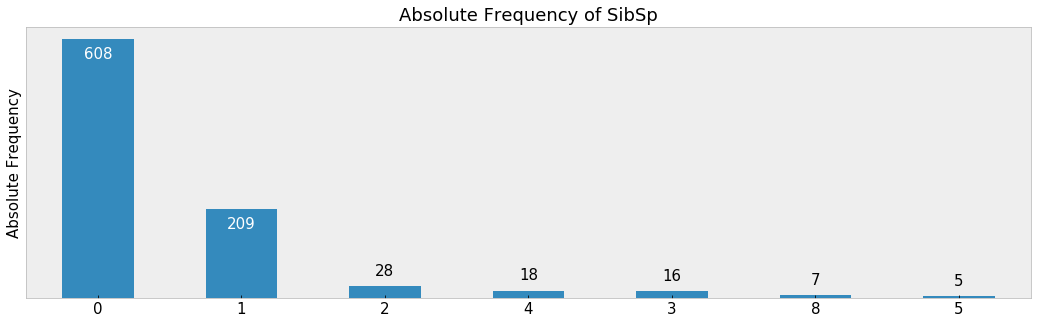

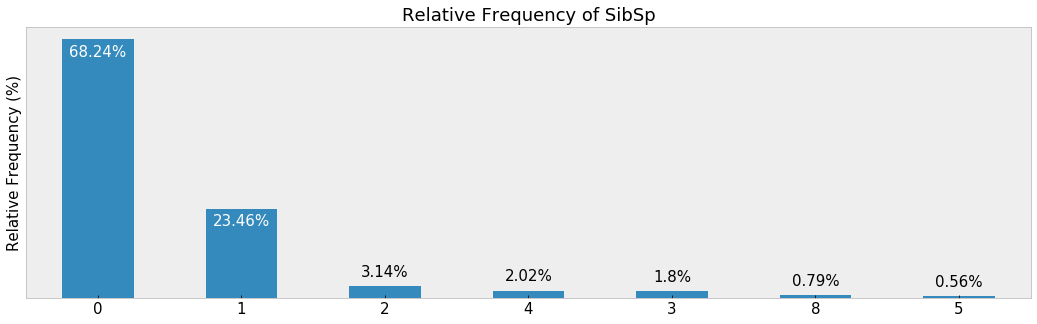

In [11]:
absolute_and_relative_freq(train.SibSp)

#### 4.1.6 Parch

Univariable Analysis: Parch


,Absolute Frequency,Relative Frequency(%)
0,678,76.09
1,118,13.24
2,80,8.98
5,5,0.56
3,5,0.56
4,4,0.45
6,1,0.11


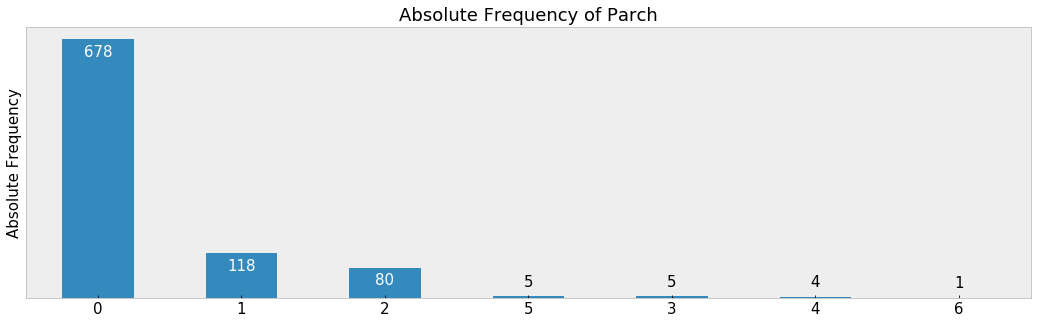

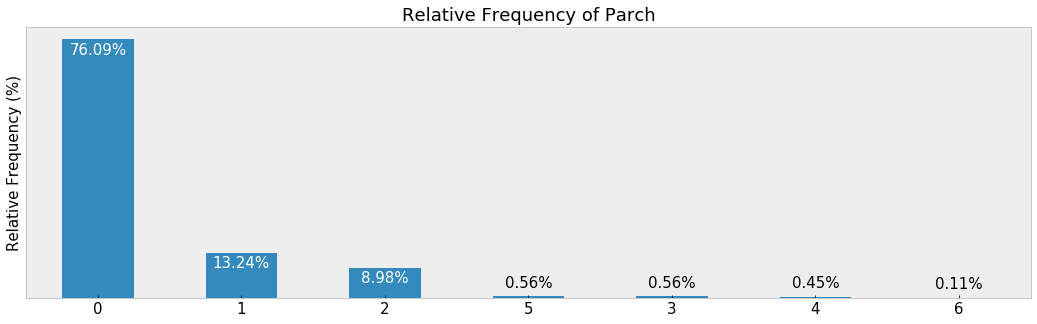

In [12]:
absolute_and_relative_freq(train.Parch)
#_absolute_and_relative_freq(train.Parch, font_size = 10)

#### 4.1.7 Cabin

In [13]:
abs_freq_cabin = train.Cabin.value_counts(dropna = False)
bold('**Categories of Cabin:**')
display(abs_freq_cabin)
bold('**# of Categories in Cabin:**')
display(abs_freq_cabin.count())

**Categories of Cabin:**

NaN            687
G6               4
C23 C25 C27      4
B96 B98          4
E101             3
              ... 
E38              1
C85              1
D48              1
D37              1
F38              1
Name: Cabin, Length: 148, dtype: int64

**# of Categories in Cabin:**

148

#### 4.1.8 Name

In [14]:
bold('**# of Categories in Name:**')
display(train.Name.value_counts().count())
bold('**Preview Name:**')
display(train.Name.head())

**# of Categories in Name:**

891

**Preview Name:**

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

#### 4.1.9 Ticket

In [15]:
bold('**# of Categories in Ticket:**')
display(train.Ticket.value_counts().count())
bold('**Preview Ticket:**')
display(train.Ticket.head())

**# of Categories in Ticket:**

681

**Preview Ticket:**

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

**Note:** Cabin, Name, Ticket are alphanumeric type of vabiable with so much categories which need to be processed to get any insight about association between Survived and Cabin, Name, Ticket.

### 4.2 Numerical Variables
We would like to analyse numerical variables using **histogram**, **density plot**, and **summary statistics**. To analyse numerical variables, we will create three custom functions -
1. to plot **histogram** for each numerical variables
2. to plot **kernel density plot**
3. to calculate **skewness** and other **stats**.

In [16]:
def histogram(variable, skewness):
    global ax
    font_size = 15
    fig_size = (18, 7)
    title_size = 18
    ax = variable.plot.hist(figsize = fig_size, color = 'teal')
    plt.xlabel('%s' %variable.name, fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.title('%s' %variable.name + ' Distribution with Histogram', fontsize = title_size)
    abs_bar_labels(skewness)
    plt.show()
    
def density_plot(variable):
    fig_size = (18, 7)
    font_size = 15
    title_size = 18
    plt.figure(figsize = fig_size)
    variable.plot.hist(density = True, color = 'orchid')
    variable.plot.kde(style = 'k--')
    plt.xlabel('%s'%variable.name, fontsize = font_size)
    plt.ylabel('Density', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.title('%s ' %variable.name + 'Distribution with Density Plot & Histogram', fontsize = title_size)
    plt.show()
    
def summary_stats(variable):
    stats = variable.describe()
    skew = pd.Series(variable.skew(), index = ['skewness'])
    df_stats = pd.DataFrame(pd.concat([skew, stats], sort = False), columns = [variable.name])
    df_stats.index.name = 'Stats'
    display(df_stats)
    
def hds(variable, skewness = 'none'):
    histogram(variable, skewness)
    density_plot(variable)
    summary_stats(variable)

#### 4.2.1 Fare

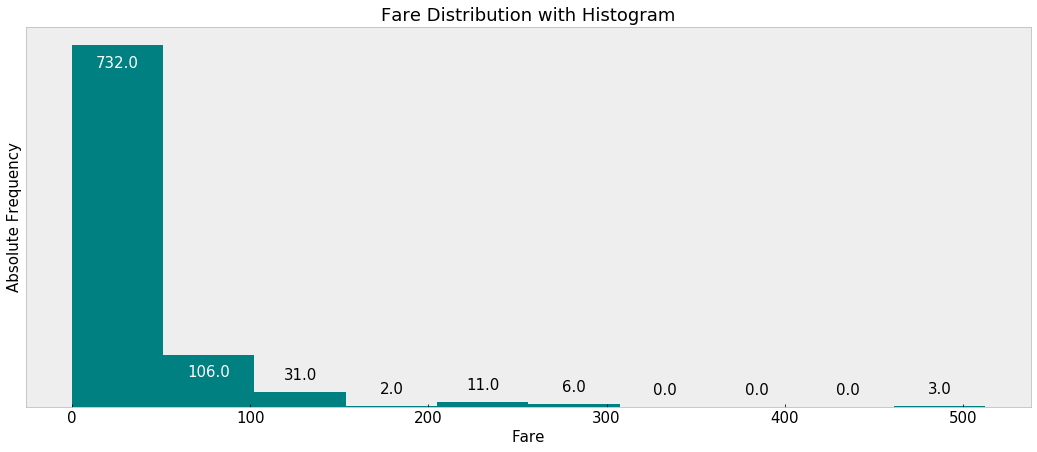

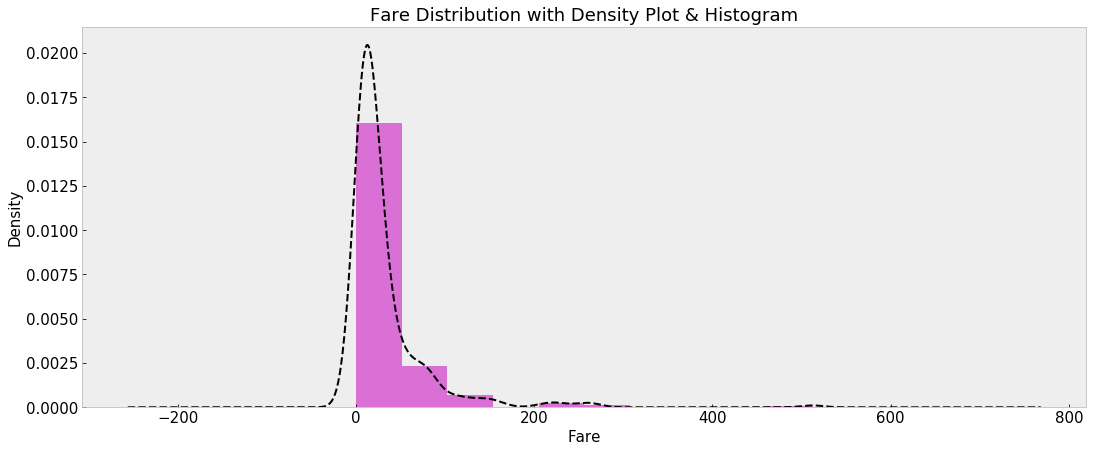

,Fare
Stats,
skewness,4.787317
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [17]:
hds(train.Fare)

**Skewness measurement**
1. If skewness is less than −1 or greater than +1, the distribution can be considered as **highly skewed**.
2. If skewness is between −1 and −½ or between +½ and +1, the distribution can be considered as **moderately skewed**.
3. If skewness is between −½ and +½, the distribution can be considered as **approximately symmetric**.    
4. If skewness is equal to 0, the distribution is **uniform**.

**Note:** Density plot shows the mass of the distribution of Fare is heavily concentrated on the left of the figure due to very long tail on the right side. So it can be said that Fare is substantially **skewed positively** that is also supported by the calculated positive value of skewness of 4.368

#### 4.2.2 Age

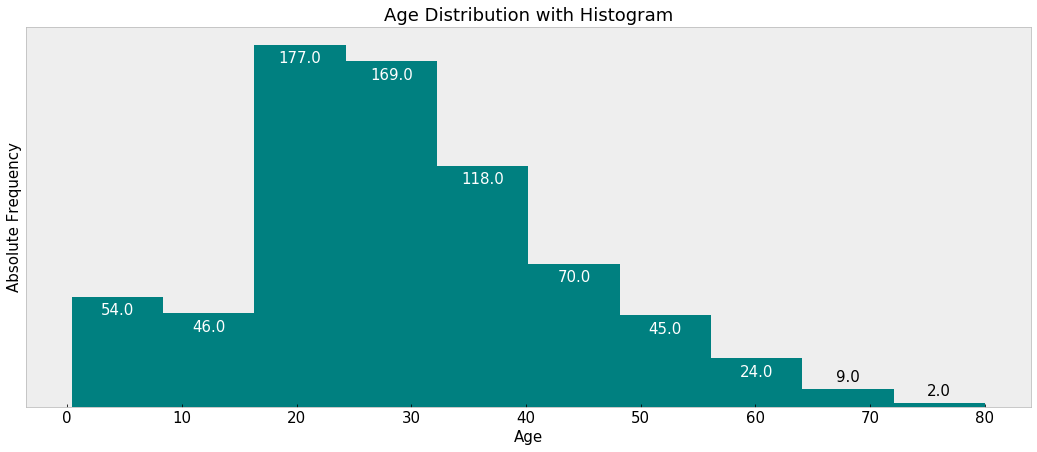

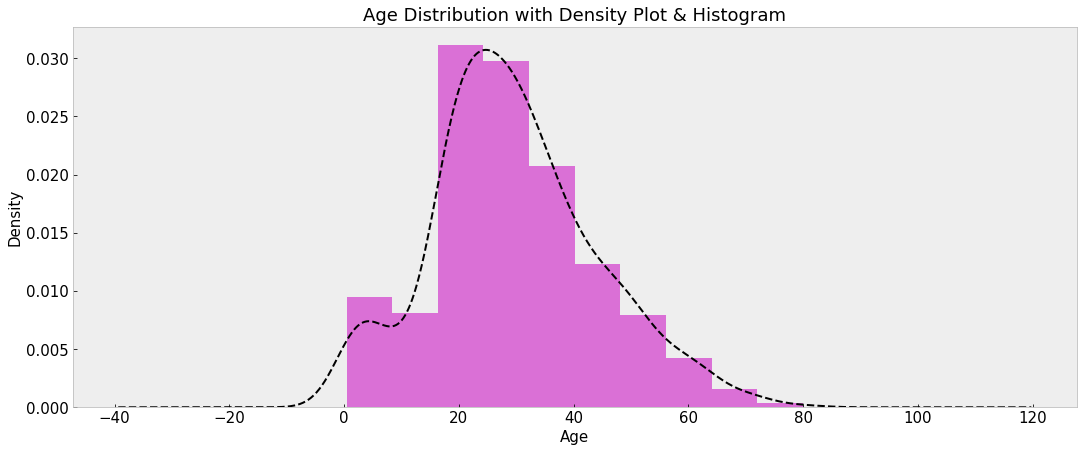

,Age
Stats,
skewness,0.389108
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [18]:
hds(train.Age, 'uniform')

As the skewness of plot is 0.389, the data is approximately symmetric with some irregularity at the left portion.

#### 4.2.3 PassengerId
PassengersId is an unique identity number (positive integer) aka primary key in database assigned to each passenger and has nothing to do with survival.

# 5. Feature Engineering

In this section, we would either modify or create new features from the exsisting features which are otherwise hard to analyse in their raw forms that we saw in Univariate Analysis section. We would engineer features like **Cabin**, **Name**, **SibSp** & **Parch** and **Ticket** that could tell us something about survival or death once they're processed.

### 5.1 Cabin

In [19]:
bold('**Preview of Cabin:**')
display(train.Cabin.head())

**Preview of Cabin:**

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

**Note:** It seems that Cabin contains some null values - it's obvious, isn't it? Most of the passengers may travel by deck and can't afford to book a cabin.

In [20]:
bold("**People travel board on deck, not cabin:**")
display(train.Cabin.isnull().sum())

# bold("**Summary:**")
# display(train.Cabin.describe())

# bold("**All categories:**")
# display(train.Cabin.value_counts(dropna = False))

bold("**Total categories:**")
display(train.Cabin.value_counts(dropna = False).count())

**People travel board on deck, not cabin:**

687

**Total categories:**

148

**Note:** It seems that the cabin numbers are alphanumeric variables which starts with a letter followed by two or three numbers. So, we can categorize them by the first letter.

Again, as there exists many null values as most of the passengers don't acquire a cabin, we label them by character 'X' to differentiate with the other cabin categorites.

In [21]:
train.Cabin.fillna(value = 'X', inplace = True)

In [22]:
train.Cabin = train.Cabin.apply(lambda x : x[0])

In [23]:
bold('**Cabin Categories after processing:**')
display(train.Cabin.value_counts())

**Cabin Categories after processing:**

X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

Univariable Analysis: Cabin


,Absolute Frequency,Relative Frequency(%)
X,687,77.10
C,59,6.62
B,47,5.27
D,33,3.70
E,32,3.59
A,15,1.68
F,13,1.46
G,4,0.45
T,1,0.11


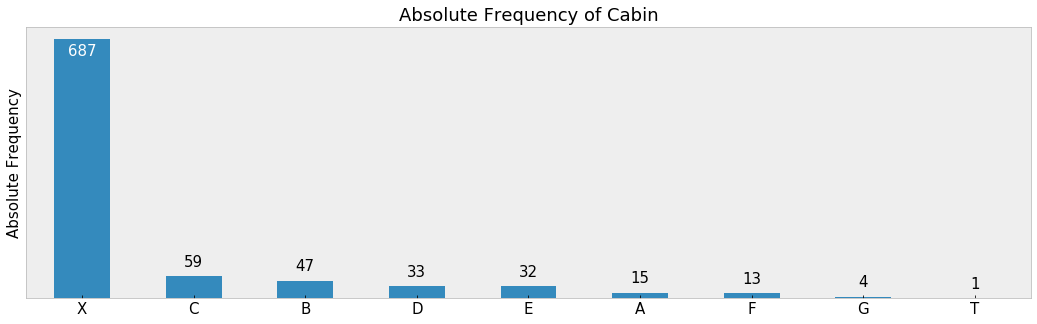

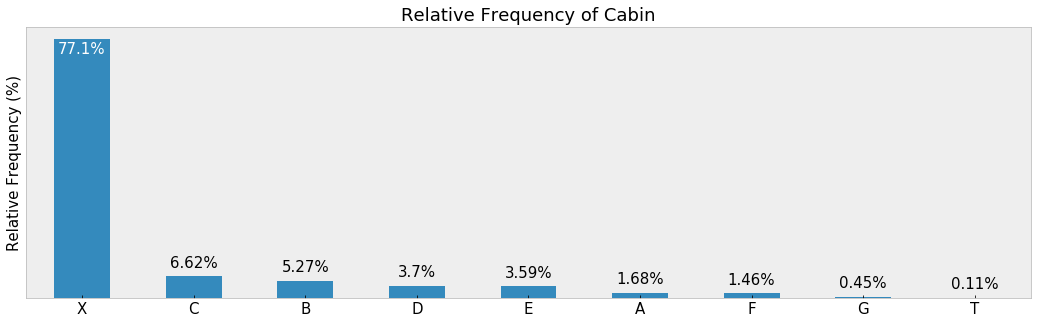

In [24]:
absolute_and_relative_freq(train.Cabin)
#_absolute_and_relative_freq(train.Cabin)

### 5.2 Title

In [25]:
bold('**Preview of Name:**')
display(train.Name.head(10))

**Preview of Name:**

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

**Note:** The name contains **Title** for the passengers which can be useful for our decision making such as: we can get some info about sex(Mr: Male, Mrs: Married Female, Miss: Unmarried Female), age(Mrs are usually older than Miss), profession(Master,) etc of the passengers.

In [26]:
train['Title'] = train.Name.str.extract('([A-Za-z]+)\.')

In [27]:
bold('**Preview Title:**')
display(train.Title.head(10))
bold('**Categories by Title:**')
display(train.Title.value_counts())

**Preview Title:**

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

**Categories by Title:**

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Lady          1
Capt          1
Sir           1
Jonkheer      1
Don           1
Countess      1
Mme           1
Ms            1
Name: Title, dtype: int64

We can see there are several titles with the very least frequency. So, it makes sense to put them in fewer buckets.

1. Professionals like **Dr**, **Rev**, **Col**, **Major**, **Capt** will be put into **'Officer'** bucket.
2. Titles such as **Dona**, **Jonkheer**, **Countess**, **Sir**, **Lady**, **Don** were usually entitled to the aristocrats and hence these titles will be put into bucket **'Aristocrat'**.
3. We would also replace **Mlle** and **Ms** with **Miss** and **Mme** by **Mrs** as these are French titles.

In [28]:
train.Title.replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace = True)
train.Title.replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)
train.Title.replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

In [29]:
bold('**Categories by Title:**')
display(train.Title.value_counts())

**Categories by Title:**

Mr            517
Miss          185
Mrs           126
Master         40
Officer        18
Aristocrat      5
Name: Title, dtype: int64

Univariable Analysis: Title


,Absolute Frequency,Relative Frequency(%)
Mr,517,58.02
Miss,185,20.76
Mrs,126,14.14
Master,40,4.49
Officer,18,2.02
Aristocrat,5,0.56


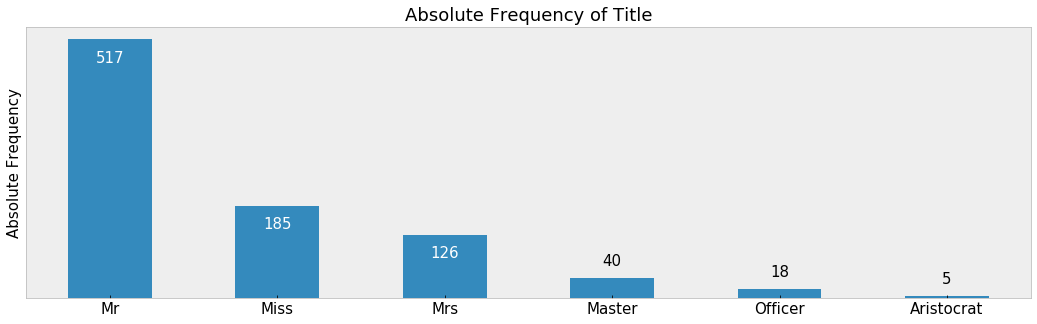

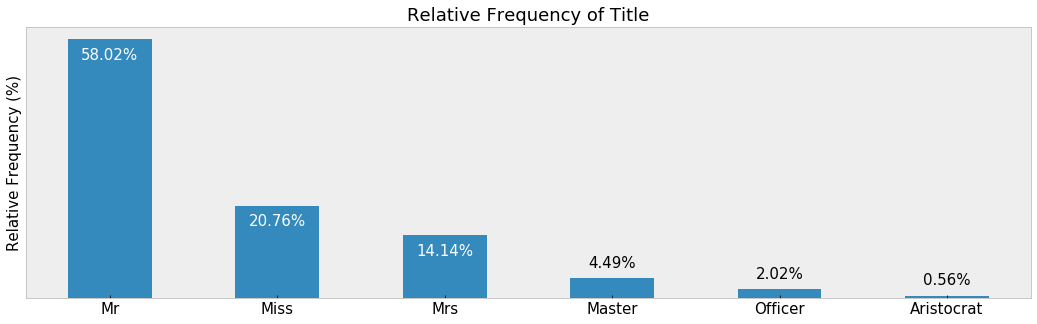

In [30]:
absolute_and_relative_freq(train.Title)
#_absolute_and_relative_freq(train.Title)

### 5.3 SibSp & Parch
In univariate analysis, we saw some passengers had siblings/spouses and some didn't have. The same is also true for variable Parch. Since these two variables together indicate the size of a family, we would create a new variable 'Family_size' from these two variables.

In [31]:
train['Family_size'] = train.SibSp + train.Parch + 1
bold('**Categories in Family_size**')
display(train.Family_size.value_counts())

**Categories in Family_size**

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_size, dtype: int64

We see there are several family sizes with the very least frequency. So its sensible to put them in a fewer buckets. We will create 4 buckets namely **single**, **small**, **medium**, and **large** for rest of them.

In [32]:
train.Family_size.replace(to_replace = [1], value = 'single', inplace = True)
train.Family_size.replace(to_replace = [2, 3], value = 'small', inplace = True)
train.Family_size.replace(to_replace = [4, 5], value = 'medium', inplace = True)
train.Family_size.replace(to_replace = [6, 7, 8, 11], value = 'large', inplace = True)

Univariable Analysis: Family_size


,Absolute Frequency,Relative Frequency(%)
single,537,60.27
small,263,29.52
large,47,5.27
medium,44,4.94


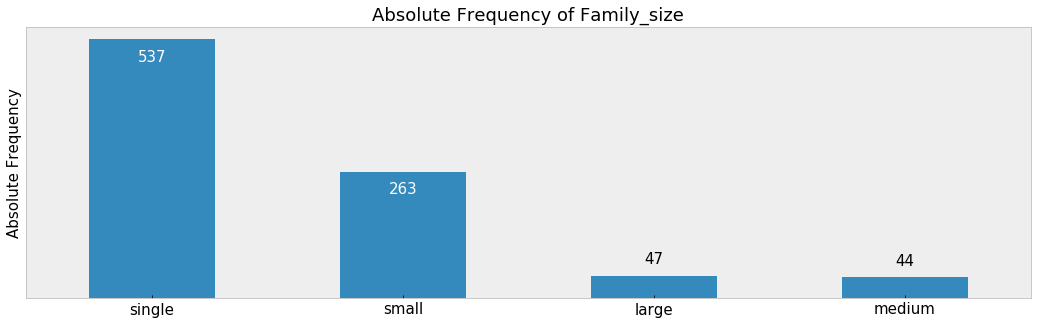

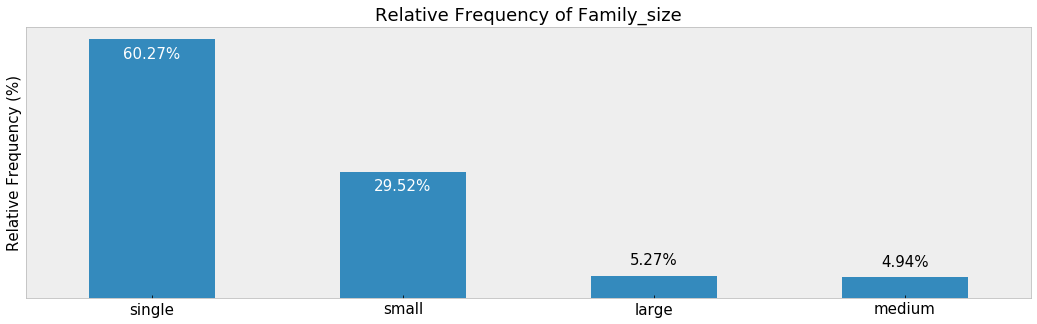

In [33]:
absolute_and_relative_freq(train.Family_size)
#_absolute_and_relative_freq(train.Family_size)

### 5.3 Ticket

In [34]:
display(train.Ticket.head())

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [35]:
ticket = []
for x in list(train.Ticket):
    if x.isdigit():
        ticket.append('N')
    else:
        ticket.append(x.replace('.','').replace('/','').strip().split(' ')[0])
train.Ticket = ticket
train.Ticket = train.Ticket.apply(lambda x : x[0])

Univariable Analysis: Ticket


,Absolute Frequency,Relative Frequency(%)
N,661,74.19
S,65,7.30
P,65,7.30
C,47,5.27
A,29,3.25
W,13,1.46
F,7,0.79
L,4,0.45


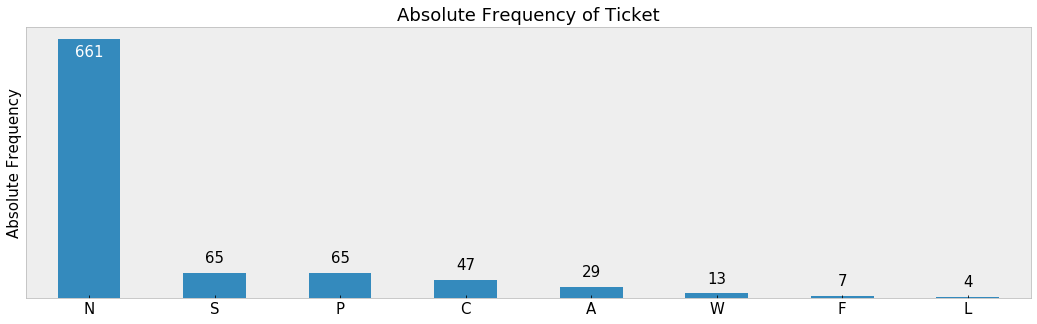

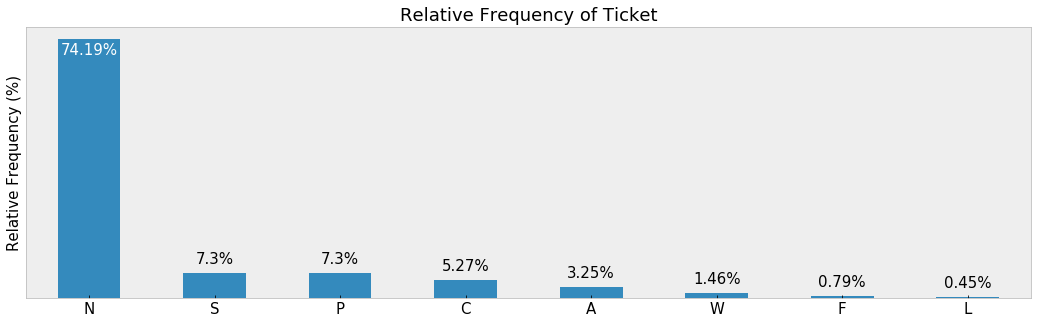

In [36]:
absolute_and_relative_freq(train.Ticket)
#_absolute_and_relative_freq(train.Ticket)

# 6. Outliers Detection

**How outliers affect the distribution:** If a value of a variable is significantly above the expected range, it will drag the distribution to the right, making the graph right-skewed or positive-skewed (like Fare). Alternatively, If a value is significantly below the expected range, it will drag the distribution to the left, making the graph left-skewed or negative-skewed.

A Very useful plot for visualizing a continuous variable with the outliers is **Box plot**. Box plot is particularly helpful to understand the spread of the continus data and whether there are potential unusual observations (outliers) in that variable. It presents information of minimun, 1st quartile, 2nd quartile (median), 3rd quartile, and the maximum of a variable.

We will use **Inter-quratile Range** method to detect the outliers for variable **Age** and **Fare** though we won't remove them.

In [37]:
def outliers(variable):
    global filtered
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    l_limit, u_limit = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = variable[(variable < l_limit) | (variable > u_limit)]
    print('Number of outliers in', variable.name, ':', outliers.count())
    filtered = variable.drop(outliers.index, axis = 0)
    
    out_variables = [variable, filtered]
    out_titles = [' distribution with outliters', ' distribution without outliters']
    title_size = 25
    font_size = 18
    plt.figure(figsize = (25, 15))
    for ax, outlier, title in zip(range(1,3), out_variables, out_titles):
        plt.subplot(2, 1, ax)
        sns.boxplot(outlier).set_title('%s' %outlier.name + title, fontsize = title_size)
        plt.xticks(fontsize = font_size)
        plt.xlabel('%s' %outlier.name, fontsize = font_size)

Number of outliers in Age : 11


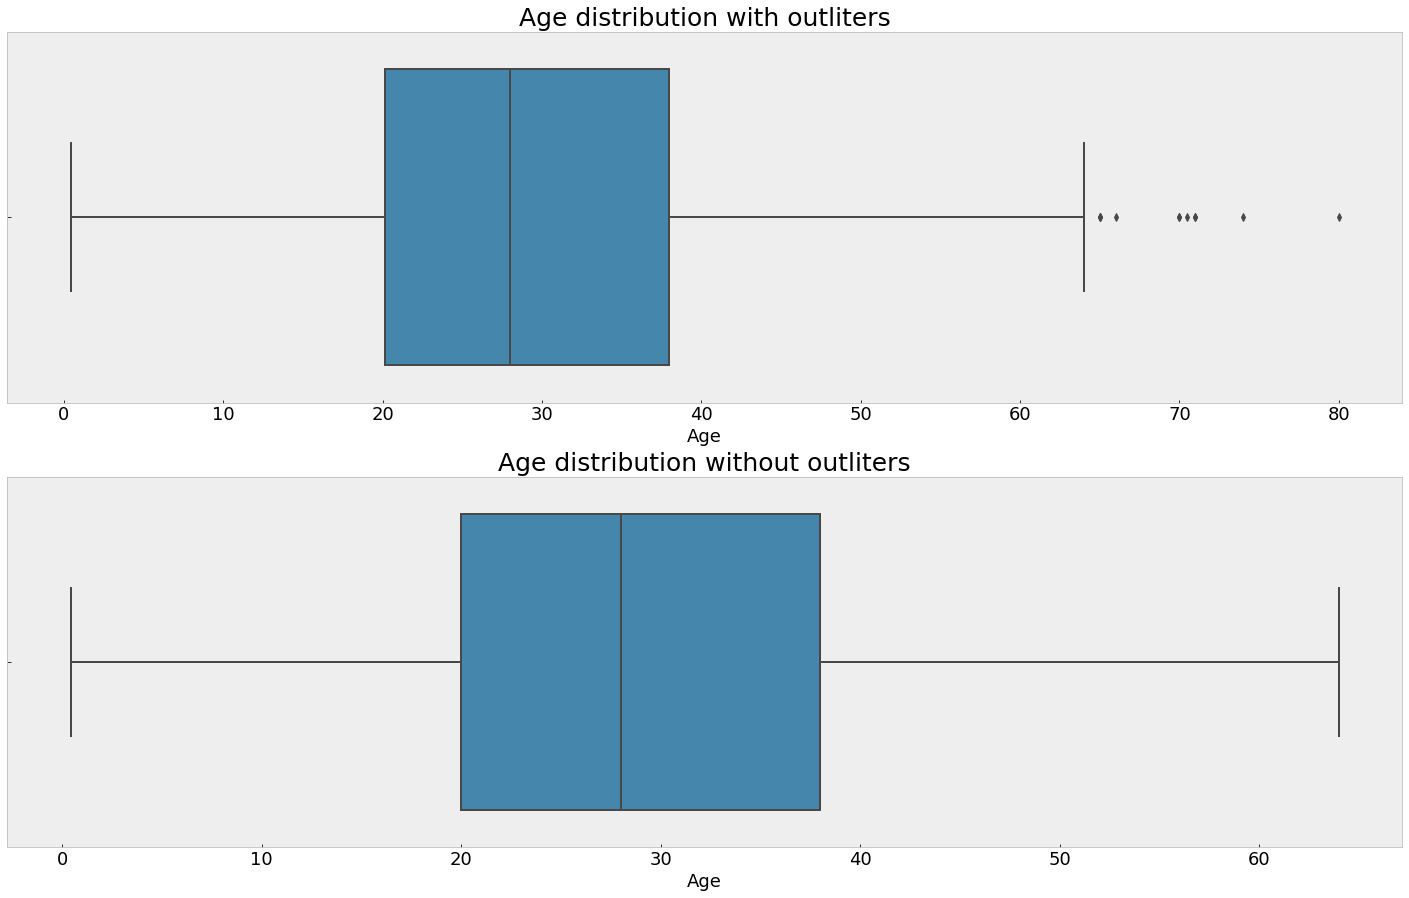

In [38]:
outliers(train.Age)

Number of outliers in Fare : 116


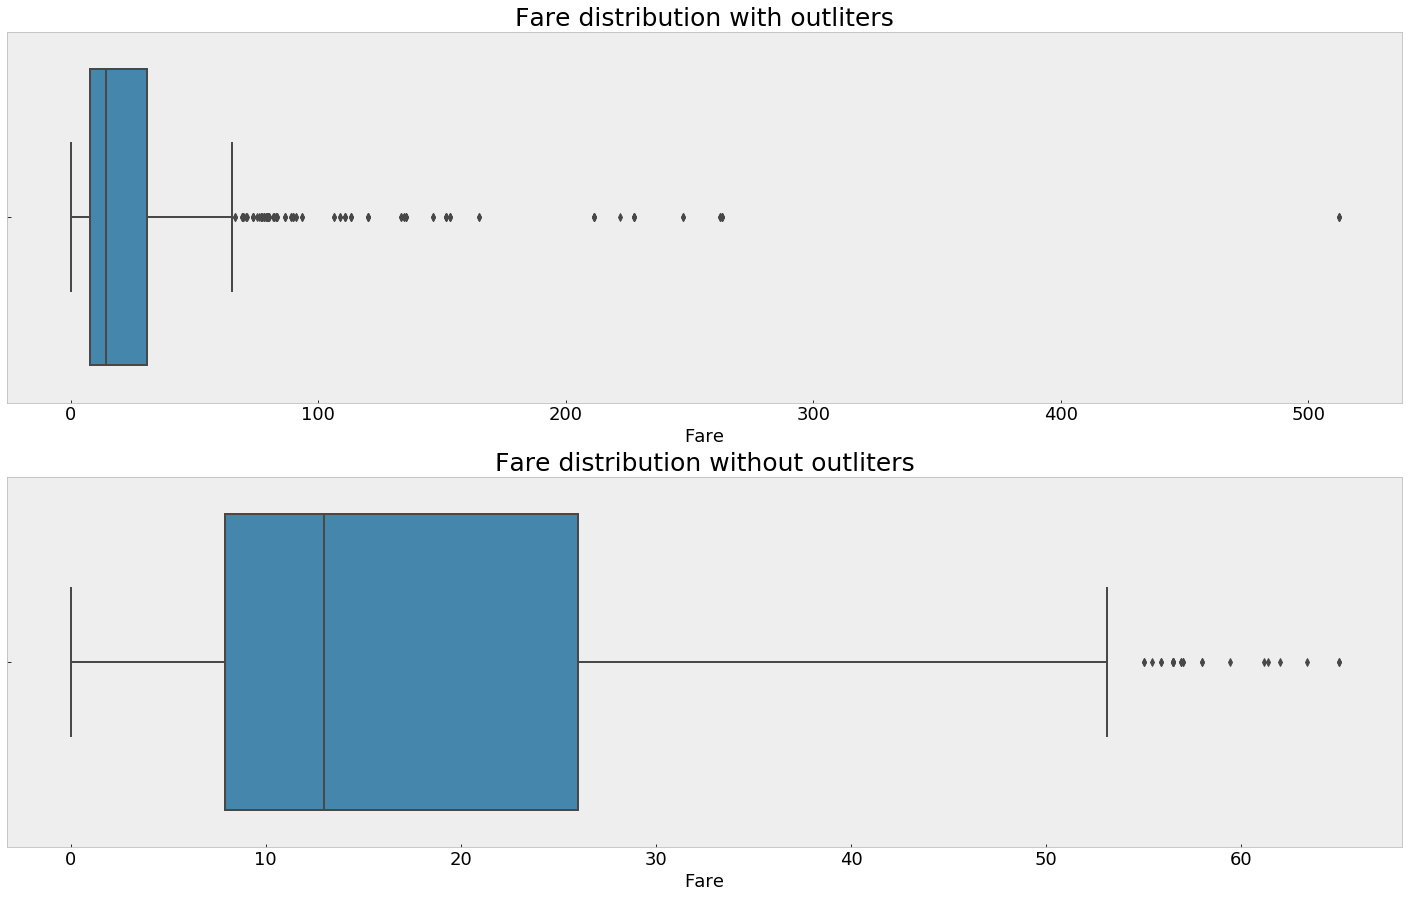

In [39]:
outliers(train.Fare)

**Note:** Don't know why there is still some outliers in the Fare distribution boxplot.

### <i>Hypothesis Testing</i>
<b>Hyp#01: </b>Female intends to hide their ages more than men (for the missing age values)

In [40]:
train['Age'].isnull().sum()/train.shape[0] * 100

19.865319865319865

In [41]:
test['Age'].isnull().sum()/test.shape[0] * 100

20.574162679425836

In [42]:
train[train['Age'].isnull()]['Sex'].value_counts()/train['Sex'].value_counts() * 100

male      21.490468
female    16.878981
Name: Sex, dtype: float64

In [43]:
test[test['Age'].isnull()]['Sex'].value_counts()/test['Sex'].value_counts() * 100

male      22.932331
female    16.447368
Name: Sex, dtype: float64

<p style="color:#A52A2A;"><b>Hyp#01: FAILS</b><br>
Male age missing > Female age missing</p>

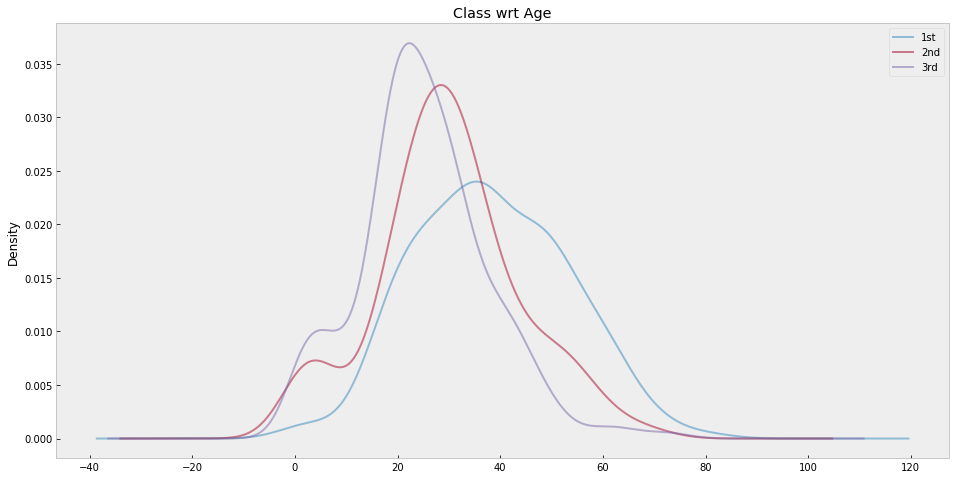

In [44]:
fig_size = (16, 8)
for x in [1, 2, 3]:
    train.Age[train.Pclass == x].plot(kind='kde', alpha=.5, figsize = fig_size)
plt.title('Class wrt Age')
plt.legend(('1st', '2nd', '3rd'))

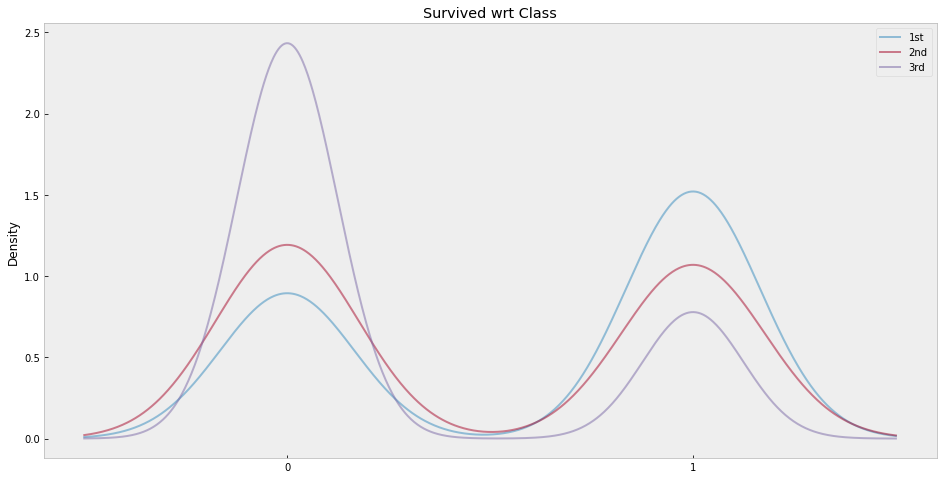

In [45]:
fig_size = (16, 8)
for x in [1, 2, 3]:
    train.Survived[train.Pclass == x].plot(kind='kde', alpha=.5, figsize = fig_size)
plt.title('Survived wrt Class')
plt.xticks(np.arange(0, 2, 1))
plt.legend(('1st', '2nd', '3rd'))

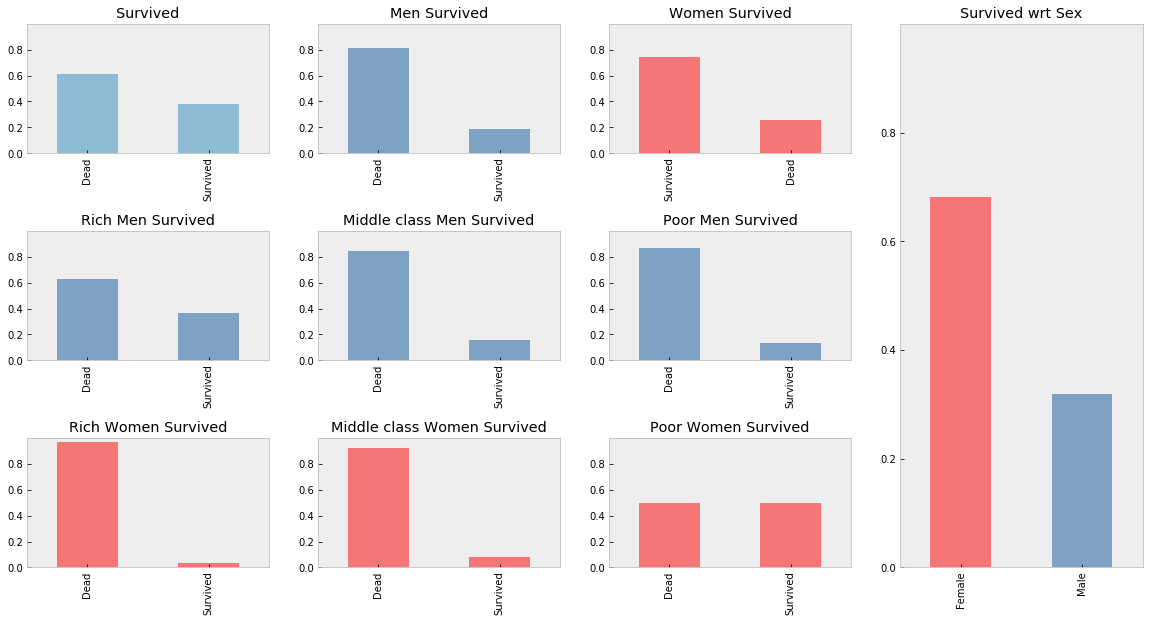

In [46]:
female_color = '#FA0000'
male_color = '#115599'
y_scale = np.arange(0, 1, .20)
# SURVIVED
plt.subplot2grid((3, 4), (0, 0))
train.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10))
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Dead', 'Survived'])
plt.title('Survived')

# MEN SURVIVED
plt.subplot2grid((3, 4), (0, 1))
train.Survived[train.Sex == 'male'].value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10), color = male_color)
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Dead', 'Survived'])
plt.title('Men Survived')

# WOMEN SURVIVED
plt.subplot2grid((3, 4), (0, 2))
train.Survived[train.Sex == 'female'].value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10), color = female_color)
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Survived', 'Dead'])
plt.title('Women Survived')

# SURVIVED wrt SEX
plt.subplot2grid((3, 4), (0, 3), rowspan = 3)
train.Sex[train.Survived == 1].value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10), color = (female_color, male_color))
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Female', 'Male'])
plt.title('Survived wrt Sex')

# RICH MEN SURVIVED
plt.subplot2grid((3, 4), (1, 0))
train.Survived[(train.Sex == 'male') & (train.Pclass == 1)].value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10), color = male_color)
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Dead', 'Survived'])
plt.title('Rich Men Survived')

# MIDDLE CLASS MEN SURVIVED
plt.subplot2grid((3, 4), (1, 1))
train.Survived[(train.Sex == 'male') & (train.Pclass == 2)].value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10), color = male_color)
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Dead', 'Survived'])
plt.title('Middle class Men Survived')

# POOR MEN SURVIVED
plt.subplot2grid((3, 4), (1, 2))
train.Survived[(train.Sex == 'male') & (train.Pclass == 3)].value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10), color = male_color)
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Dead', 'Survived'])
plt.title('Poor Men Survived')

# RICH WOMEN SURVIVED
plt.subplot2grid((3, 4), (2, 0))
train.Survived[(train.Sex == 'female') & (train.Pclass == 1)].value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10), color=female_color)
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Dead', 'Survived'])
plt.title('Rich Women Survived')

# MIDDLE CLASS WOMEN SURVIVED
plt.subplot2grid((3, 4), (2, 1))
train.Survived[(train.Sex == 'female') & (train.Pclass == 2)].value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10), color=female_color)
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Dead', 'Survived'])
plt.title('Middle class Women Survived')

# POOR WOMEN SURVIVED
plt.subplot2grid((3, 4), (2, 2))
train.Survived[(train.Sex == 'female') & (train.Pclass == 3)].value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10), color=female_color)
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Dead', 'Survived'])
plt.title('Poor Women Survived')

plt.subplots_adjust(hspace=.6)

**Note:** Now it is clear - why Jack died and Rose lives in the Cameron film!

In [47]:
def bar_chart(feature, normalize=False, stacked=True):
    survived = train[train['Survived']==1][feature].value_counts(normalize=normalize)
    dead = train[train['Survived']==0][feature].value_counts(normalize=normalize)
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', color=['#FF5500', 'green', '#0000FF'], stacked=stacked, figsize=(12, 6), alpha=0.5)
    
def bar_chart_normal(feature, stacked=False):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead], index=['Survived', 'Dead'])
    
    newS = []
    newD = []
    
    if (int(df.columns[-1]) + 1 != len(df.columns)):
        for i in range(int(df.columns[-1]) + 1):
            if i not in df.columns:
                df[i] = [np.nan, np.nan]
                

    for i in range(len(df.columns)):
        for j in range(len(df.index)):
            if(df[i].isnull().any()):
                df[i][j] = 0
                
            if(j == 0):
                newS.append(df[i][j] / (df[i][j] + df[i][j + 1]) * 100)
            elif(j == 1):
                newD.append(df[i][j] / (df[i][j - 1] + df[i][j]) * 100)

    newList = pd.DataFrame([newS, newD], index=['Survived', 'Dead'])
    newList_T = newList.T
    newList_T.plot(kind='bar', color=['#FF5500', 'green'], stacked=stacked, figsize=(12, 6), alpha=0.5)

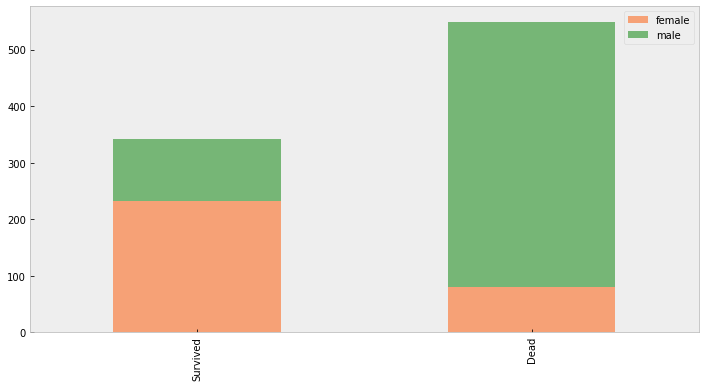

In [48]:
bar_chart('Sex')

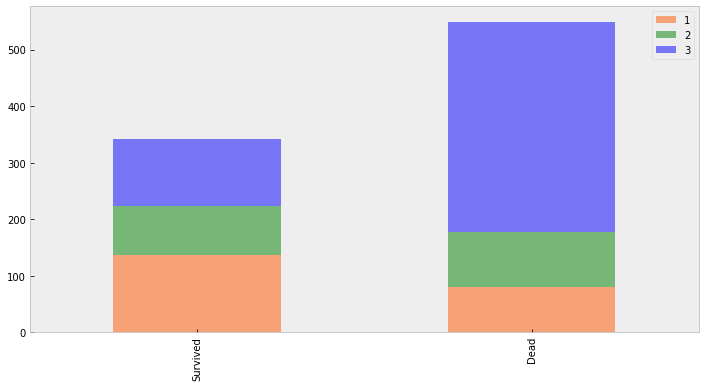

In [49]:
bar_chart('Pclass')

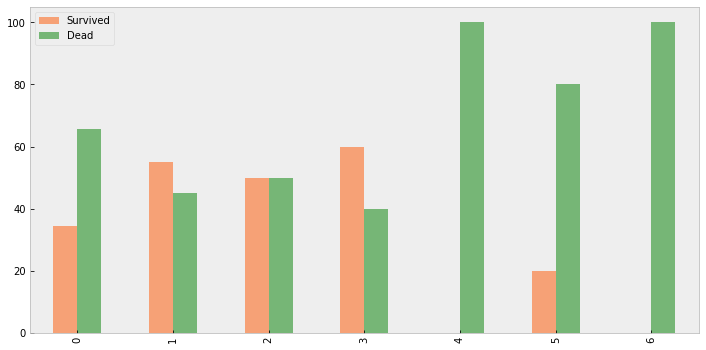

In [50]:
bar_chart_normal('Parch')

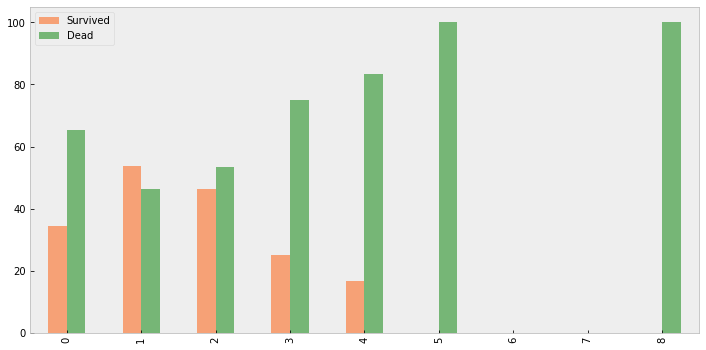

In [51]:
bar_chart_normal('SibSp')

### <i>Hypothesis Testing</i><br>
<b>Hyp#02: </b>Let all women live! Hope that prediction will meet more that 50% accurately.

In [52]:
train['Hyp'] = 0
train.loc[train.Sex == 'female', 'Hyp'] = 1

train['Result'] = 0
train.loc[train.Survived == train['Hyp'], 'Result'] = 1

train['Result'].value_counts(normalize = True) * 100

1    78.675645
0    21.324355
Name: Result, dtype: float64

<p style="color:#006400;"><b>Hyp#02: PASSED</b><br>
Accuracy: 78.68%</p>